## Libraries

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Date and Time
import datetime
import calendar

# Math and Location
import math
import geopandas as gpd

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error

## 1. Import Files

In [ ]:
searches_file = ('searches.tsv')
searches = pd.read_csv(searches_file, sep="\t")
contacts_file = ("contacts.tsv")
contacts = pd.read_csv(contacts_file, sep='\t')

# Cleaned Up file in Alteryx Designer
searches_file_v2 = ("searches_v2.tsv")
searches_v2 = pd.read_csv(searches_file_v2, sep='\t')
contacts_file_v2 = ("contacts_v2.tsv")
contacts_v2 = pd.read_csv(contacts_file_v2, sep='\t')

# Merged Searches & Contacts based on id_user = id_guest
# Done in Alteryx Designer
# I will say that there is duplication involved
searches_contacts_file = ("searches_contacts_joined.tsv")
searches_contacts = pd.read_csv(searches_contacts_file, sep='\t')

## 2. Box Plots by Guest Size & Number of Nights

In [ ]:
search_input = searches_contacts[['n_nights', 'n_guests_max', 'ts_booking_at_dt']]
for i in range(len(search_input)):
    if pd.isna(search_input.loc[i, 'ts_booking_at_dt']):
        search_input.loc[i, 'ts_booking_at_dt'] = "No Booking" #0
    else:
        search_input.loc[i, 'ts_booking_at_dt'] = "Secured Booking"#1

search_input.dropna(subset=['n_nights'], inplace=True)
search_input.dropna(subset=['n_guests_max'], inplace=True)

/tmp/ipykernel_62/1568204073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_input.dropna(subset=['n_nights'], inplace=True)
/tmp/ipykernel_62/1568204073.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_input.dropna(subset=['n_guests_max'], inplace=True)


[Text(0.5, 0, 'Max # of Guests'), Text(0, 0.5, 'Booking Status')]

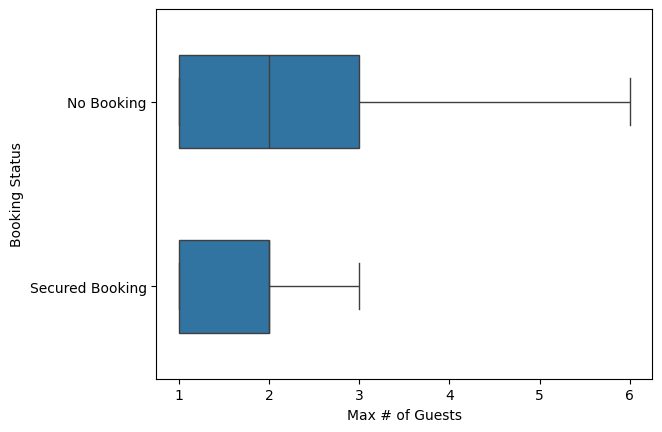

In [ ]:
sns.boxplot(data=search_input,x="n_guests_max",y="ts_booking_at_dt",width=.5,showfliers=False).set(
    xlabel='Max # of Guests', 
    ylabel='Booking Status'
)

[Text(0.5, 0, 'Max # of Nights'), Text(0, 0.5, 'Booking Status')]

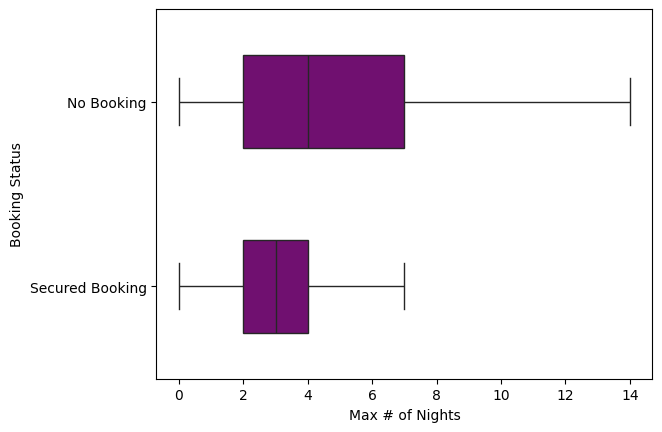

In [ ]:
sns.boxplot(data=search_input,x="n_nights",y="ts_booking_at_dt", color = 'purple',width=.5,showfliers=False).set(
    xlabel='Max # of Nights', 
    ylabel='Booking Status'
)

## 3. Days Between Booking and Check-in [NOT IN PRESENTATION]

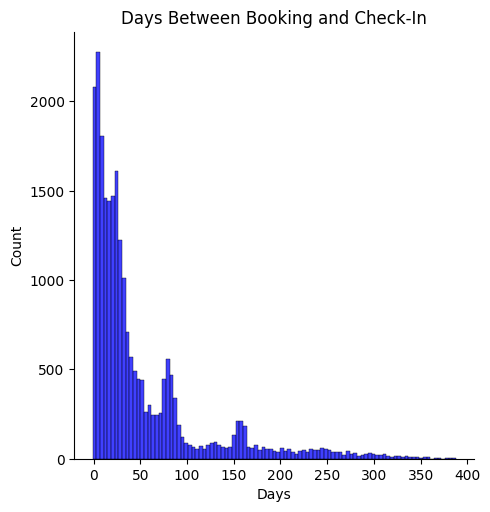

In [ ]:
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])
searches['ds'] = pd.to_datetime(searches['ds'])

dates = searches[['ds_checkin', 'ds_checkout', 'ds']].dropna()
dates['duration'] = dates['ds_checkout'] - dates['ds_checkin']
dates['Days'] = dates['ds_checkin'] - dates['ds']

lead_time = dates['Days'] / np.timedelta64(1, 'D')
lead_time = lead_time[lead_time < 400]
sns.displot(x=lead_time, color='blue')
plt.title('Days Between Booking and Check-In')
plt.show()

## 4. Search Counts by Specified Neighborhoods

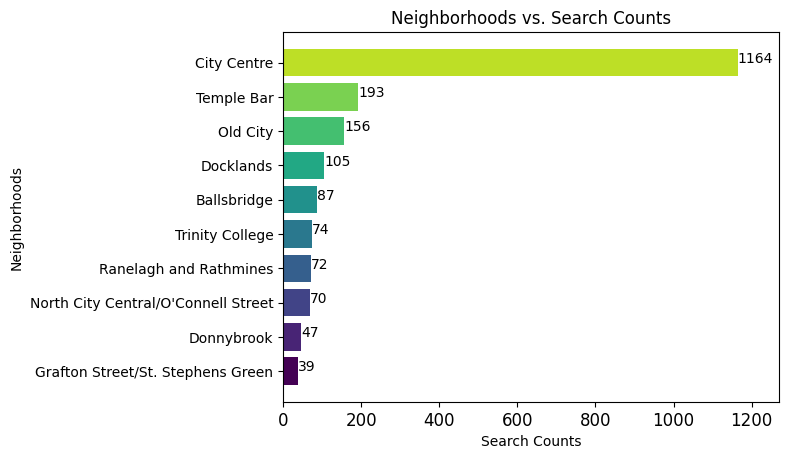

In [ ]:
n_count = dict()
neighborhoods = searches[['filter_neighborhoods']].dropna()

for index,row in neighborhoods.iterrows():
    n = row['filter_neighborhoods']
    n = n.strip(',')
    n = n.split(',')
    for i in n:
        if i in n_count:
            n_count[i] += 1
        else:
            n_count[i] = 1


n_df = pd.DataFrame({
    "Location": n_count.keys(),
    "Searches" : n_count.values()
})

n_df = n_df.nlargest(10,["Searches"]).sort_values(by="Searches")
location = n_df["Location"].tolist()
count = n_df["Searches"].tolist()

colors = plt.get_cmap('viridis')
amount = len(count)
x = np.arange(amount)

for index, value in enumerate(count):
    plt.text(value, index,
             str(value))

plt.barh(location, count, tick_label=location, color=colors(x / amount))
plt.xticks(fontsize=12)
plt.title("Neighborhoods vs. Search Counts")
plt.xlabel("Search Counts")
plt.ylabel("Neighborhoods")
plt.xlim(0, 1270)
plt.show()

## 5. Top 3 Searched Neighborhoods and their prices

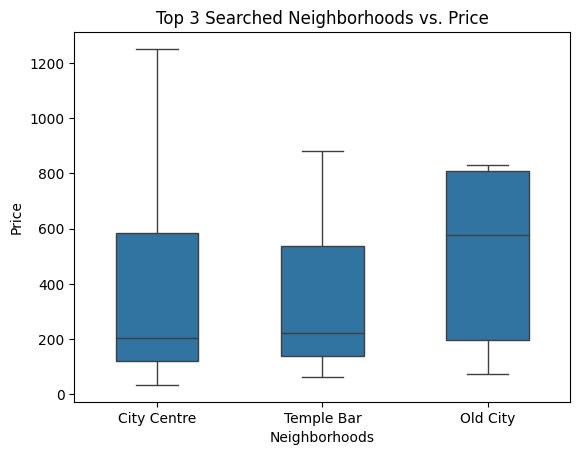

'\nprint(n_df_low.iloc[0,0])\n# lowest 3\nn_df_v2_1 = n_df_v2_1[(n_df_v2_1[\'filter_neighborhoods\'] == n_df_low.iloc[0,0]) | \n                 (n_df_v2_1[\'filter_neighborhoods\'] == n_df_low.iloc[1,0]) | \n                 (n_df_v2_1[\'filter_neighborhoods\'] == n_df_low.iloc[2,0])]\n\nn_df_v2_1.reset_index(drop=True, inplace=True)\n\ndisplay(n_df_v2_1)\n\nsns.boxplot(data=n_df_v2_1, x="filter_neighborhoods", y="filter_price_max", width=0.5, showfliers=False)\nplt.xlabel(\'Neighborhoods\')\nplt.ylabel(\'Price\')\nplt.show()\n'

In [ ]:
n_count = dict()

n_df = searches[['filter_neighborhoods']].dropna()
n_df_v2 = searches_v2[['filter_neighborhoods', 'filter_price_max']].dropna()
n_df_v2_1 = searches_v2[['filter_neighborhoods', 'filter_price_max']].dropna()

for index,row in neighborhoods.iterrows():
    n = row['filter_neighborhoods']
    n = n.strip(',')
    n = n.split(',')
    for i in n:
        if i in n_count:
            n_count[i] += 1
        else:
            n_count[i] = 1


n_df = pd.DataFrame({
    "Location": n_count.keys(),
    "Searches" : n_count.values()
})

n_df_top10 = n_df.nlargest(10,["Searches"]).sort_values(by="Searches")
n_df_high = n_df.nlargest(3,["Searches"]).sort_values(by="Searches")
n_df_low = n_df_top10.nsmallest(3,["Searches"]).sort_values(by="Searches")

n_df_v2 = n_df_v2[(n_df_v2['filter_neighborhoods'] == n_df_high.iloc[0,0]) | 
                 (n_df_v2['filter_neighborhoods'] == n_df_high.iloc[1,0]) | 
                 (n_df_v2['filter_neighborhoods'] == n_df_high.iloc[2,0])]

n_df_v2.reset_index(drop=True, inplace=True)

sns.boxplot(data=n_df_v2, x="filter_neighborhoods", y="filter_price_max", width=0.5, showfliers=False)
plt.xlabel('Neighborhoods')
plt.ylabel('Price')
plt.title('Top 3 Searched Neighborhoods vs. Price')
plt.show()

"""
print(n_df_low.iloc[0,0])
# lowest 3
n_df_v2_1 = n_df_v2_1[(n_df_v2_1['filter_neighborhoods'] == n_df_low.iloc[0,0]) | 
                 (n_df_v2_1['filter_neighborhoods'] == n_df_low.iloc[1,0]) | 
                 (n_df_v2_1['filter_neighborhoods'] == n_df_low.iloc[2,0])]

n_df_v2_1.reset_index(drop=True, inplace=True)

display(n_df_v2_1)

sns.boxplot(data=n_df_v2_1, x="filter_neighborhoods", y="filter_price_max", width=0.5, showfliers=False)
plt.xlabel('Neighborhoods')
plt.ylabel('Price')
plt.show()
"""

## 6. Heatmap

<AxesSubplot: title={'center': 'DAY VS. MONTH: # OF CHECK INS'}, xlabel='month', ylabel='day'>

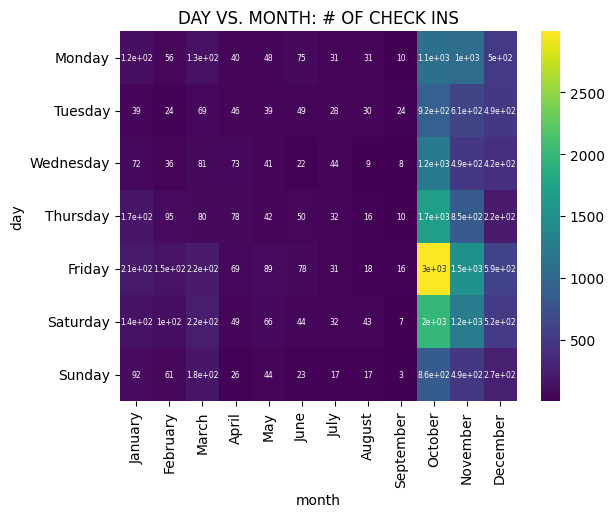

In [ ]:
def check_weekday_or_weekend(date):
    given_date = datetime.datetime.strptime(date, '%Y-%m-%d')
    day_of_week = (given_date.weekday() + 1) % 7 

    if day_of_week == 0:
        day_word = 'Sunday'
    elif day_of_week == 1:
        day_word = 'Monday'
    elif day_of_week == 2:
        day_word = 'Tuesday'
    elif day_of_week == 3:
        day_word = 'Wednesday'
    elif day_of_week == 4:
        day_word = 'Thursday'
    elif day_of_week == 5:
        day_word = 'Friday'
    elif day_of_week == 6:
        day_word = 'Saturday'

    return day_word

def check_month(date):
    date = date.split('-')
    month = int(date[1])
    return calendar.month_name[month]


days_dict = dict()

for i in searches_v2['ds_checkin_date'].dropna():
    day = check_weekday_or_weekend(i)
    month = check_month(i)
    if (day,month) in days_dict:
        days_dict[(day,month)] += 1
    else:
        days_dict[(day,month)] = 1

days_data = pd.DataFrame(list(days_dict.items()), columns=['(x, y)', 'count'])
days_data[['day', 'month']] = pd.DataFrame(days_data['(x, y)'].tolist(), index=days_data.index)
days_data.drop('(x, y)', axis=1, inplace=True)

days_data['day'] = pd.Categorical(days_data['day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
days_data['month'] = pd.Categorical(days_data['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

plt.title('DAY VS. MONTH: # OF CHECK INS')
grid = days_data.pivot(index='day', columns='month', values='count')
sns.heatmap(grid, annot=True, annot_kws={'size': 5.5}, cmap='viridis')

## 7. Room Types

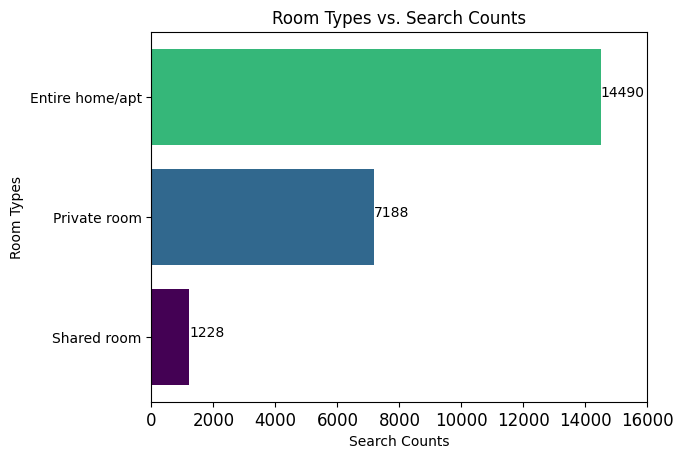

In [ ]:
n_count = dict()
rooms = searches[['filter_room_types']].dropna()

for index,row in rooms.iterrows():
    n = row['filter_room_types']
    n = n.strip(',')
    n = n.split(',')
    for i in n:
        if i in n_count:
            n_count[i] += 1
        else:
            n_count[i] = 1

n_df = pd.DataFrame({
    "Location": n_count.keys(),
    "Searches" : n_count.values()
})

n_df = n_df.nlargest(10,["Searches"]).sort_values(by="Searches")
location = n_df["Location"].tolist()
count = n_df["Searches"].tolist()

colors = plt.get_cmap('viridis')
amount = len(count)
x = np.arange(amount)

plt.barh(location, count, tick_label=location, color=colors(x / amount))

for index, value in enumerate(count):
    plt.text(value, index,
             str(value))

plt.xticks(fontsize=12)
plt.title("Room Types vs. Search Counts")
plt.xlabel("Search Counts")
plt.ylabel("Room Types")
plt.xlim(0, 16000)
plt.show()

## 8. Price Preferences

/tmp/ipykernel_62/702654108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_prices['Price'] = max_prices['filter_price_max']


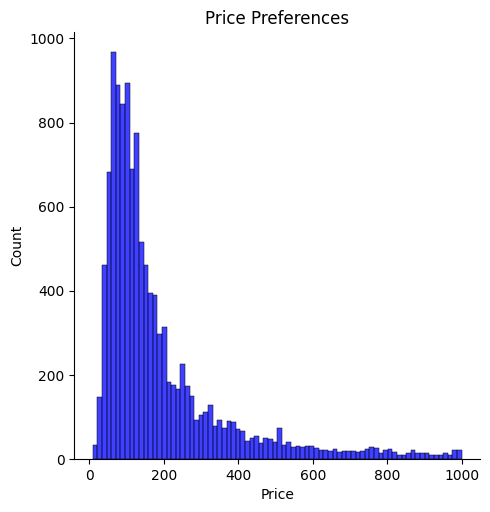

In [ ]:
max_prices = searches[searches['filter_price_max'] < 1000]
max_prices['Price'] = max_prices['filter_price_max']
sns.displot(x=max_prices['Price'], color='blue')
plt.title('Price Preferences')
plt.show()

In [ ]:
merged_datasets = contacts.merge(searches_v2, left_on='id_guest', right_on='id_user')

In [ ]:
!pip install country_converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 9.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


## 9. Country Map

Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


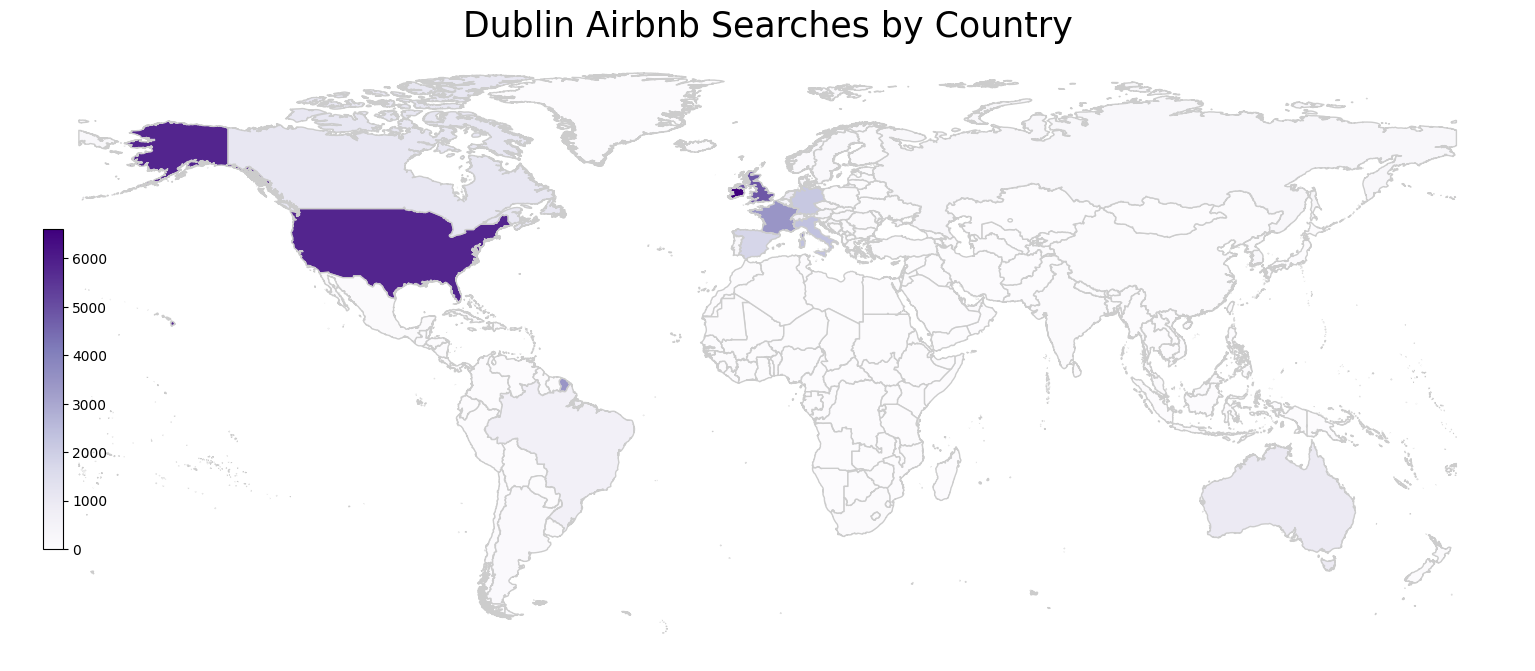

In [ ]:
import country_converter as coco

countries = searches[['origin_country']]
countries_dict = {}

for index,row in countries.iterrows():
    country = row['origin_country']
    if country in countries_dict:
        countries_dict[country] += 1
    else:
        countries_dict[country] = 1

country_keys = countries_dict.keys()
country_values = countries_dict.values()
heatmap_data = {
    'origin_country': country_keys,
    'Count': country_values
}
countries_df = pd.DataFrame(heatmap_data)

SHAPEFILE = '/work/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)
iso3_codes = geo_df['country'].to_list()
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')
geo_df['iso2_code'] = iso2_codes_list
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)
merged_df = pd.merge(left=geo_df, right=countries_df, how='left', left_on='iso2_code', right_on='origin_country')
merged_df = merged_df.drop(['origin_country'], axis=1)
merged_df['Count'] = merged_df['Count'].fillna(0)
vmin = merged_df['Count'].min()
vmax = merged_df['Count'].max()
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.axis('off')
merged_df.plot(column='Count', ax=ax, edgecolor='0.8', linewidth=1, cmap='Purples')
ax.set_title('Dublin Airbnb Searches by Country', fontdict={'fontsize': '25', 'fontweight': '3'})
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Purples')
sm._A = []
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

# 10. DecisionTreeClassifier Confusion Matrix

/tmp/ipykernel_62/388091242.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_input['ts_booking_at_dt'] = search_input['ts_booking_at_dt'].astype(int)


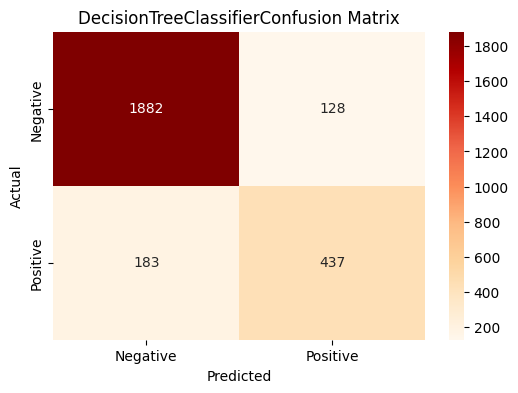


Accuracy: 0.8817490494296578
Mean Squared Error: 0.11825095057034221


In [ ]:
search_input = searches_contacts[['n_nights', 'n_guests_max', 'filter_price_max', 'n_messages', 'ts_booking_at_dt']]

for i in range(len(search_input)):
    if pd.isna(search_input.loc[i, 'ts_booking_at_dt']):
        search_input.loc[i, 'ts_booking_at_dt'] = 0
    else:
        search_input.loc[i, 'ts_booking_at_dt'] = 1

search_input['ts_booking_at_dt'] = search_input['ts_booking_at_dt'].astype(int)
search_input = search_input.dropna()
search_input['filter_price_max'] = search_input['filter_price_max'].astype(int)
inputs = search_input[['n_nights', 'n_guests_max', 'filter_price_max', 'n_messages']]
outputs = search_input['ts_booking_at_dt']

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="OrRd", fmt='g', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('DecisionTreeClassifierConfusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# 11. RandomForestClassifier Confusion Matrix

/tmp/ipykernel_62/2544508913.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_input['ts_booking_at_dt'] = search_input['ts_booking_at_dt'].astype(int)


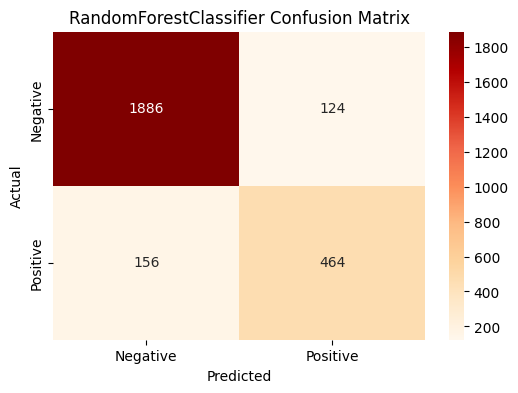


Accuracy: 0.8935361216730038
Mean Squared Error: 0.10646387832699619


In [ ]:
search_input = searches_contacts[['n_nights', 'n_guests_max', 'filter_price_max', 'n_messages', 'ts_booking_at_dt']]

for i in range(len(search_input)):
    if pd.isna(search_input.loc[i, 'ts_booking_at_dt']):
        search_input.loc[i, 'ts_booking_at_dt'] = 0
    else:
        search_input.loc[i, 'ts_booking_at_dt'] = 1

search_input['ts_booking_at_dt'] = search_input['ts_booking_at_dt'].astype(int)
search_input = search_input.dropna()
search_input['filter_price_max'] = search_input['filter_price_max'].astype(int)
inputs = search_input[['n_nights', 'n_guests_max', 'filter_price_max', 'n_messages']]
outputs = search_input['ts_booking_at_dt']

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="OrRd", fmt='g', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForestClassifier Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6cced6a8-fe40-40d7-b88b-a3eb124108df' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>